In [88]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV, RFE

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle("../../../data/Visual_well_being/merged_features.pickle")

In [126]:
response_columns = ['P', 'E', 'R', 'M', 'A', 'PERMA']
category_columns = ['gender', 'education', 'employed', 'income', 'participate']
Y = df[response_columns]
X = df.drop(response_columns + category_columns, axis=1)

In [127]:
y = Y['PERMA']

In [128]:
model = GradientBoostingRegressor()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Optimal number of features : 45


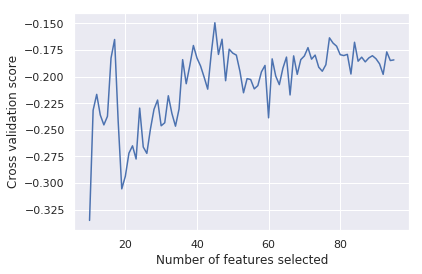

In [130]:
rfecv = RFECV(model, cv=5, step=1,
              min_features_to_select=10,
              n_jobs=-1,
              scoring='r2') # 'neg_mean_squared_error', 'neg_mean_absolute_error', 'explained_variance', 'r2'
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(10, len(rfecv.grid_scores_) + 10), rfecv.grid_scores_)
plt.show()

In [132]:
rfe = RFE(estimator=model, n_features_to_select=45, step=1)
_ = rfe.fit(X_train, y_train)

In [133]:
idx=[i for i in range(len(X.columns)) if rfe.support_[i]]
X_train = X_train.iloc[:,idx]
X_test = X_test.iloc[:,idx]
print(X_train.columns)

Index(['user_followed_by', 'user_follows', 'Plant', 'Food', 'Collage', 'Book',
       'Sky', 'Alcohol', 'Crowd', 'Toy', 'Sport', 'Teddy Bear', 'Sunlight',
       'Drawing', 'TV', 'Bikini', 'Beard', 'Woman', 'Pool', 'Performer',
       'Coffee Cup', 'Tattoo', 'Festival', 'Beer Bottle', 'Money', 'avg_likes',
       'avg_comments', 'happy_flt_pct', 'avg_posts_early_day',
       'avg_posts_late_day', 'avg_posts_early_night', 'avg_posts_late_night',
       'avg_posts_night', 'avg_posts_whole_date', 'percentage_animals', 'CALM',
       'SAD', 'SURPRISED_x', 'ratio_male', 'ratio_female', 'cluster_1',
       'cluster_2', 'total_number_of_likes', 'total_number_of_comments',
       'imagecount'],
      dtype='object')


In [21]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

/home/zenbook/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


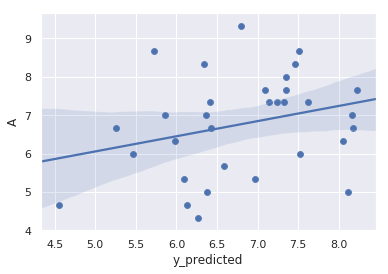

Mean squared error: 1.81
Mean absolute error: 1.08
R2: -0.11


In [22]:
#y_predicted = cross_val_predict(model, X, y, cv=10)
y_predicted = model.predict(X_test)
ax = sns.scatterplot(y_predicted, y_test)
ax = sns.regplot(y_predicted, y_test)
ax.set(xlabel='y_predicted')
plt.show()


r2 = r2_score(y_test, y_predicted)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_predicted))
print('R2: %.2f' % r2)

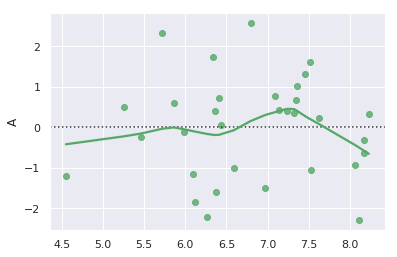

In [23]:
sns.residplot(y_predicted, y_test, lowess=True, color="g")

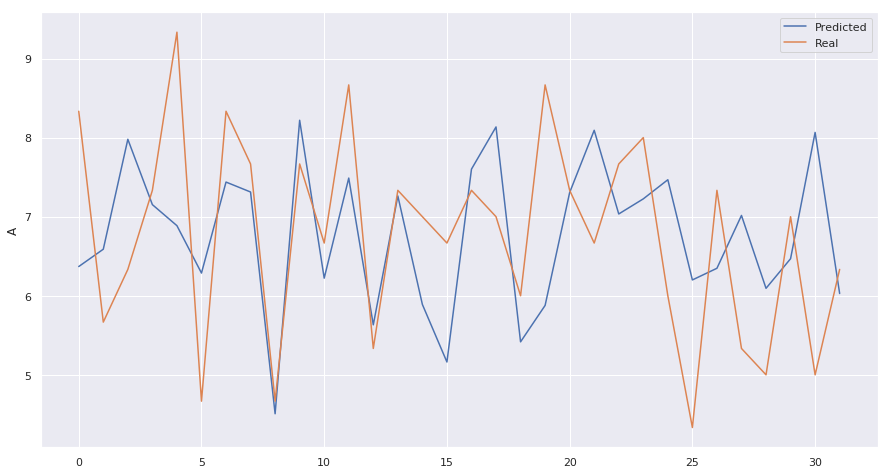

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(range(len(y_predicted)),y_predicted, label="Predicted")
sns.lineplot(range(len(y_test)),y_test, label="Real")